In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [3]:
df8 = pd.read_csv(R"Data\final_version\bound_8_final.csv")
df16= pd.read_csv(R"Data\final_version\sample_bound_size_16_final.csv")
df32 = pd.read_csv(R"Data\final_version\sample_bound_size_32_final.csv")
df64 = pd.read_csv(R"Data\final_version\sample_bound_size_64_final.csv")
dfe = pd.read_csv(R"Data\final_version\exp_final.csv")

In [4]:
dfe.groupby('disc_ratio').describe()

Unnamed: 0                                                        \
                count        mean         std    min     25%    50%     75%   
disc_ratio                                                                    
1               303.0  178.405941  100.556680    0.0   96.50  177.0  263.50   
1/121             1.0  193.000000         NaN  193.0  193.00  193.0  193.00   
1/16              4.0  151.250000   84.783548   71.0   81.50  154.0  223.75   
1/169             1.0  328.000000         NaN  328.0  328.00  328.0  328.00   
1/196             1.0  299.000000         NaN  299.0  299.00  299.0  299.00   
1/25              2.0  200.500000  115.258405  119.0  159.75  200.5  241.25   
1/4              26.0  127.923077  113.850753   13.0   43.00   66.0  214.50   
1/49              1.0  345.000000         NaN  345.0  345.00  345.0  345.00   
1/64              5.0  208.800000   90.585319   67.0  200.00  201.0  284.00   
1/9               9.0  170.000000  101.134811    7.0  111.00  142.0  244.00   

                  discriminant                ...                          \
              max        count          mean  ...         75%         max   
disc_ratio                                    ...                           
1           352.0        303.0 -2.097560e+06  ...     50757.0  32553680.0   
1/121       193.0          1.0  8.433700e+04  ...     84337.0     84337.0   
1/16        226.0          4.0 -2.138880e+05  ...    -68736.0     36096.0   
1/169       328.0          1.0 -1.163227e+06  ...  -1163227.0  -1163227.0   
1/196       299.0          1.0 -2.555056e+06  ...  -2555056.0  -2555056.0   
1/25        282.0          2.0 -2.071250e+05  ...   -143250.0    -79375.0   
1/4         337.0         26.0 -4.714628e+05  ...     25700.0    684752.0   
1/49        345.0          1.0  1.315028e+07  ...  13150277.0  13150277.0   
1/64        292.0          5.0 -1.861120e+05  ...    103424.0    355584.0   
1/9         319.0          9.0 -9.319030e+05  ...   -265023.0    138213.0   

           number                                     
            count mean  std  min  25%  50%  75%  max  
disc_ratio                                            
1           303.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
1/121         1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0  
1/16          4.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
1/169         1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0  
1/196         1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0  
1/25          2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
1/4          26.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
1/49          1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0  
1/64          5.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
1/9           9.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  

[10 rows x 24 columns]

In [5]:
def data_clean(df: pd.DataFrame) -> pd.DataFrame:

        #remove duplicate discrimant values
        df= df.drop_duplicates(subset=['discriminant', 'disc_ratio', 'gal_group', 'ring_int'])
        #convert strings to correct data types

        df['signature'] = df['signature'].apply(ast.literal_eval)
        df['coefficients'] = df['coefficients'].apply(ast.literal_eval)
        # df['disc_ratio']= df['disc_ratio'].apply(eval)
        
        # add needed colums
        df['number']= df['signature'].apply(sum)
        df['type_i'] = (df['signature'].apply(max)>1)

        return(df)

In [6]:
data_all= [df8, df16, df32, df64]
data_all_clean=[]
for B in data_all:
    D= data_clean(B)
    # D.drop_duplicates(subset=['discriminant', 'disc_ratio', 'gal_group', 'ring_int'])
    data_all_clean.append(D)
print(data_all_clean)

C:\Users\shuma\AppData\Local\Temp\ipykernel_12072\3894179471.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signature'] = df['signature'].apply(ast.literal_eval)
C:\Users\shuma\AppData\Local\Temp\ipykernel_12072\3894179471.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['coefficients'] = df['coefficients'].apply(ast.literal_eval)
C:\Users\shuma\AppData\Local\Temp\ipykernel_12072\3894179471.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

[              coefficients signature  discriminant gal_group disc_ratio  \
0      [1, -7, -8, -3, -4]       [2]      -1760871       S_4          1   
1      [1, -7, -8, -3, -2]    [2, 1]       -350191       S_4          1   
2      [1, -7, -8, -3, -1]       [2]        -50724       S_4        1/9   
3       [1, -7, -8, -3, 1]       [2]       -255856       S_4       1/16   
4       [1, -7, -8, -3, 2]       [1]       -757383       S_4          1   
...                    ...       ...           ...       ...        ...   
70059     [1, 8, 8, 8, -2]       [1]      -1161216       D_4       1/81   
70061      [1, 8, 8, 8, 1]       [2]       -249600       D_4          1   
70062      [1, 8, 8, 8, 2]       [1]       -174080       S_4          1   
70065      [1, 8, 8, 8, 5]       [1]       -611072       S_4          1   
70066      [1, 8, 8, 8, 6]       [3]       -972800       S_4          1   

       ring_int  number  type_i  
0          True       2    True  
1          True       3    Tru

C:\Users\shuma\AppData\Local\Temp\ipykernel_12072\3894179471.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['coefficients'] = df['coefficients'].apply(ast.literal_eval)
C:\Users\shuma\AppData\Local\Temp\ipykernel_12072\3894179471.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number']= df['signature'].apply(sum)
C:\Users\shuma\AppData\Local\Temp\ipykernel_12072\3894179471.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

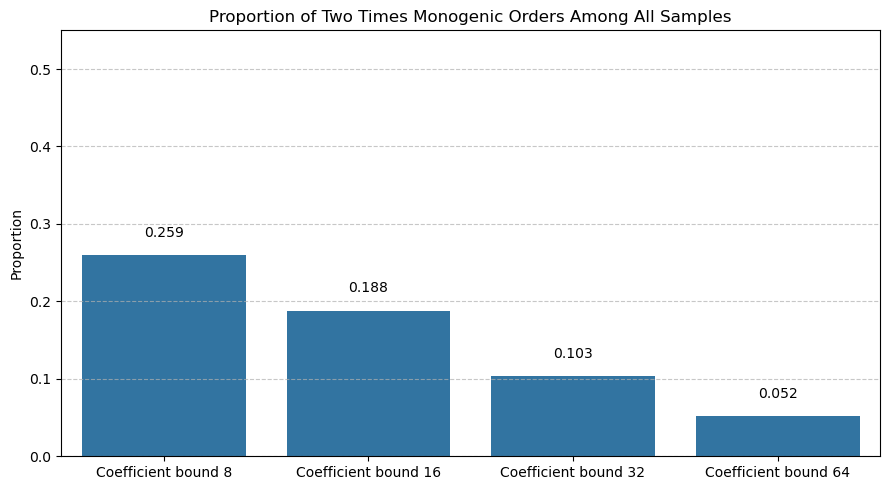

In [14]:
# Names for each dataset (optional, for labeling the x-axis)
labels = ['Coefficient bound 8', 'Coefficient bound 16', 'Coefficient bound 32', 'Coefficient bound 64']

# Calculate proportions
proportions = []
for df in data_all_clean:
    if len(df) == 0:
        proportions.append(0)
    else:
        prop = (df['number'] > 1).mean()
        proportions.append(prop)

# Create a bar plot
plt.figure(figsize=(9, 5))
ax = sns.barplot(x=labels, y=proportions)

# Add numerical labels above the bars
for i, p in enumerate(proportions):
    ax.text(i, p + 0.02, f"{p:.3f}", ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.ylabel("Proportion")
plt.title("Proportion of Two Times Monogenic Orders Among All Samples")
plt.ylim(0, 0.55) # trimmed white space
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

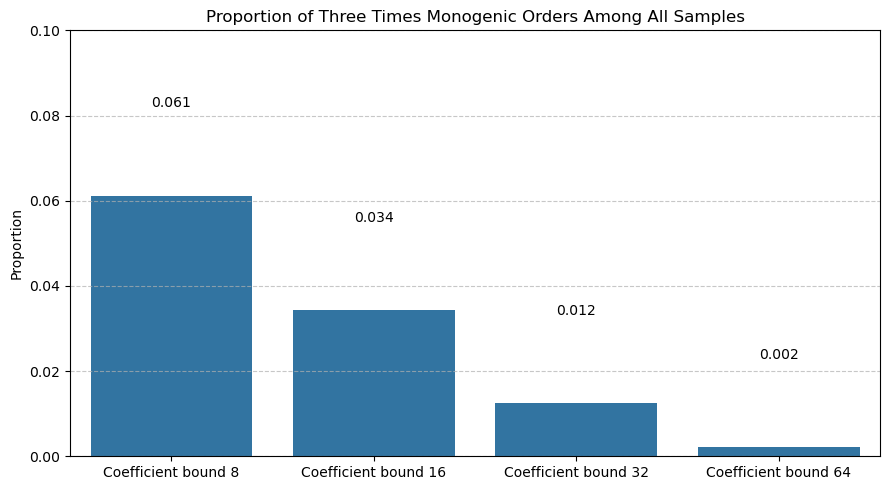

In [15]:
# Names for each dataset (optional, for labeling the x-axis)
labels = ['Coefficient bound 8', 'Coefficient bound 16', 'Coefficient bound 32', 'Coefficient bound 64']

# Calculate proportions
proportions = []
for df in data_all_clean:
    if len(df) == 0:
        proportions.append(0)
    else:
        prop = (df['number'] > 2).mean()
        proportions.append(prop)

# Create a bar plot
plt.figure(figsize=(9, 5))
ax = sns.barplot(x=labels, y=proportions)

# Add numerical labels above the bars
for i, p in enumerate(proportions):
    ax.text(i, p + 0.02, f"{p:.3f}", ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.ylabel("Proportion")
plt.title("Proportion of Three Times Monogenic Orders Among All Samples")
plt.ylim(0, 0.10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [29]:
for df in data_all_clean:
    print(df.coefficients.count())

23970
4943
4996
5000


In [60]:
df['type_II'][0]

np.False_

In [16]:
data_all_clean_2M=[]

for df in data_all_clean:
    df_new = df[df['number']>1]
    df_new= df_new.copy()
    data_all_clean_2M.append(df_new)


In [25]:
data_all_clean_1M=[]

for df in data_all_clean:
    df_new = df[df['number']== 1]
    df_new= df_new.copy()
    data_all_clean_1M.append(df_new)


In [26]:
df=dfe.copy()
dfe=df[~df['type_II']]

In [36]:
dfe.head(1)

,Unnamed: 0,coefficients,signature,discriminant,number,type_i,source,type_II,gal_group,type_I,disc_ratio,is_OK
0,0,"[1, -7, -6, -8, -6]","[1, 1]",-2686028,2,False,df8,False,S_4,NaN,1,True


In [37]:
dfe= dfe.rename(columns={'is_OK': 'ring_int'})

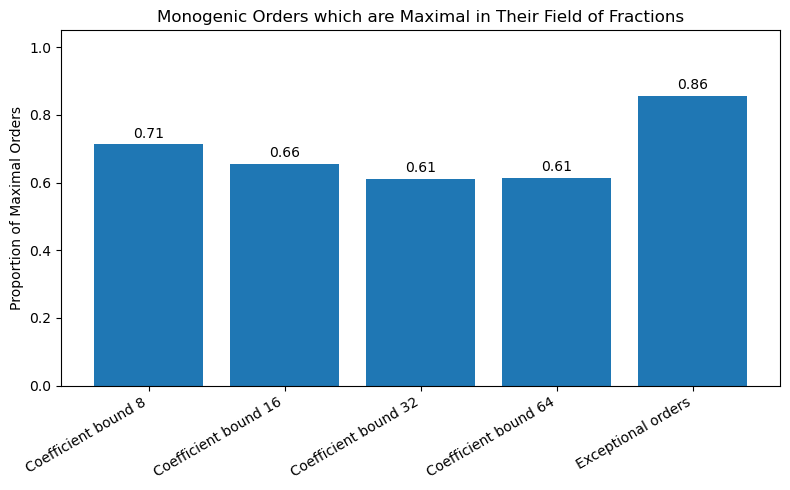

In [43]:
def ratio_one_proportion(df):
    total = len(df)
    count_ones = (df['ring_int'] == True).sum()
    return count_ones / total if total > 0 else 0

# Combine DataFrames
dfs = data_all_clean + [dfe]
labels = ['Coefficient bound 8', 
          'Coefficient bound 16',
          'Coefficient bound 32', 
          'Coefficient bound 64',
          'Exceptional orders']


# Compute proportions
proportions = [ratio_one_proportion(df) for df in dfs]

# --- Plot ---
plt.figure(figsize=(8, 5))  # Optional: control figure size

# First draw the bars
bars = plt.bar(labels, proportions)

# Then annotate values above each bar
for i, val in enumerate(proportions):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center')

# Add labels and title
plt.ylim(0, 1.05)
plt.ylabel('Proportion of Maximal Orders')
plt.title('Monogenic Orders which are Maximal in Their Field of Fractions')
plt.xticks(rotation=30, ha='right')  # optional: rotate for clarity
plt.tight_layout()
plt.show()

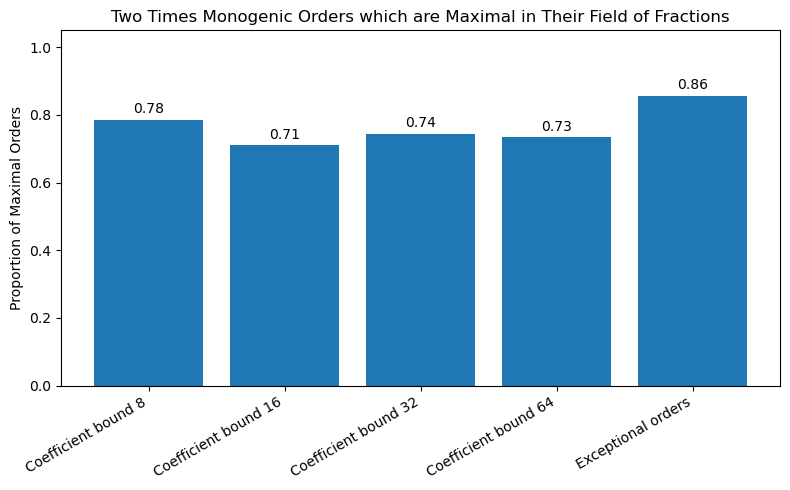

In [44]:


def ratio_one_proportion(df):
    total = len(df)
    count_ones = (df['ring_int'] == True).sum()
    return count_ones / total if total > 0 else 0

# Combine DataFrames
dfs = data_all_clean_2M + [dfe]
labels = ['Coefficient bound 8', 
          'Coefficient bound 16',
          'Coefficient bound 32', 
          'Coefficient bound 64',
          'Exceptional orders']

# Compute proportions
proportions = [ratio_one_proportion(df) for df in dfs]

# --- Plot ---
plt.figure(figsize=(8, 5))  # Optional: control figure size

# First draw the bars
bars = plt.bar(labels, proportions)

# Then annotate values above each bar
for i, val in enumerate(proportions):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center')

# Add labels and title
plt.ylim(0, 1.05)
plt.ylabel('Proportion of Maximal Orders')
plt.title('Two Times Monogenic Orders which are Maximal in Their Field of Fractions')
plt.xticks(rotation=30, ha='right')  # optional: rotate for clarity
plt.tight_layout()
plt.show()

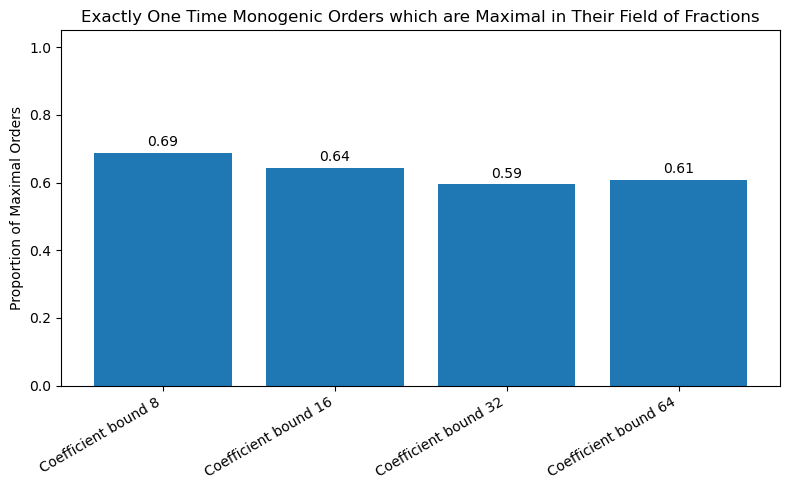

In [45]:

def ring_int_proportion(df):
    total = len(df)
    count_ones = (df['ring_int'] == True).sum()
    return count_ones / total if total > 0 else 0

# Combine DataFrames
dfs = data_all_clean_1M 
labels = ['Coefficient bound 8', 
          'Coefficient bound 16',
          'Coefficient bound 32', 
          'Coefficient bound 64']

# Compute proportions
proportions = [ring_int_proportion(df) for df in dfs]

# --- Plot ---
plt.figure(figsize=(8, 5))  # Optional: control figure size

# First draw the bars
bars = plt.bar(labels, proportions)

# Then annotate values above each bar
for i, val in enumerate(proportions):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center')

# Add labels and title
plt.ylim(0, 1.05)
plt.ylabel('Proportion of Maximal Orders')
plt.title('Exactly One Time Monogenic Orders which are Maximal in Their Field of Fractions')
plt.xticks(rotation=30, ha='right')  # optional: rotate for clarity
plt.tight_layout()
plt.show()

In [153]:
df= data_all_clean[0]
df.count()

coefficients    23970
signature       23970
discriminant    23970
gal_group       23970
disc_ratio      23970
ring_int        23970
number          23970
type_i          23970
dtype: int64

In [144]:
df_sorted= df.sort_values(by='number')
df_sorted.tail()

,coefficients,signature,discriminant,gal_group,disc_ratio,ring_int,number,type_i
4926,"[1, 1, 13, 13, 1]","[3, 3]",-1153651,S_4,1,True,6,True
6,"[1, -12, -2, 12, 2]","[4, 2]",11186432,S_4,1,True,6,True
2339,"[1, -5, 7, -3, -1]","[4, 2]",-1371,S_4,1,True,6,True
1317,"[1, -8, 16, -10, 2]","[3, 4]",-688,S_4,1,True,7,True
2100,"[1, 6, 1, -3, -1]","[1, 2, 4, 2, 0]",2777,S_4,1,True,9,True


In [128]:
print(df[df['signature'].apply(len)>=6])

          coefficients           signature  discriminant gal_group disc_ratio  \
6580  [1, -5, 5, 3, 1]  [3, 3, 0, 0, 0, 0]           229       S_4          1   
7104  [1, -3, 1, 2, 1]  [2, 2, 3, 2, 0, 0]           257       S_4          1   

      ring_int  number  type_i  
6580      True       6    True  
7104      True       9    True  


In [146]:
dfe.head()

,Unnamed: 0,coefficients,signature,discriminant,number,type_i,source,type_II,gal_group,type_I,disc_ratio,ring_int
0,0,"[1, -7, -6, -8, -6]","[1, 1]",-2686028,2,False,df8,False,S_4,NaN,1,True
1,1,"[1, -7, -6, -6, 2]","[1, 1]",-1521004,2,False,df8,False,S_4,NaN,1,True
2,2,"[1, -7, -5, -5, -6]","[1, 1]",-2949068,2,False,df8,False,S_4,NaN,1,True
4,4,"[1, -7, -4, -6, -6]","[1, 1]",-2872236,2,False,df8,False,S_4,NaN,1,True
5,5,"[1, -7, -4, -6, 2]","[1, 1]",-1246604,2,False,df8,False,S_4,NaN,1,True


In [152]:
dfe.groupby('source').describe()

Unnamed: 0                                                              \
            count        mean        std    min     25%    50%     75%    max   
source                                                                          
df16          9.0  317.555556   9.812124  304.0  309.00  318.0  324.00  334.0   
df32          4.0  342.500000   2.380476  340.0  340.75  342.5  344.25  345.0   
df64          1.0  351.000000        NaN  351.0  351.00  351.0  351.00  351.0   
df8         147.0  128.210884  97.236629    0.0   39.50  120.0  213.50  352.0   

       discriminant                ...                            number       \
              count          mean  ...           75%          max  count mean   
source                             ...                                          
df16            9.0 -2.824865e+06  ... -4.074800e+04    2673364.0    9.0  2.0   
df32            4.0 -7.428525e+06  ...  3.344080e+06   13150277.0    4.0  2.0   
df64            1.0 -2.137275e+08  ... -2.137275e+08 -213727531.0    1.0  2.0   
df8           147.0 -6.141414e+05  ... -1.465200e+04     597497.0  147.0  2.0   

                                      
        std  min  25%  50%  75%  max  
source                                
df16    0.0  2.0  2.0  2.0  2.0  2.0  
df32    0.0  2.0  2.0  2.0  2.0  2.0  
df64    NaN  2.0  2.0  2.0  2.0  2.0  
df8     0.0  2.0  2.0  2.0  2.0  2.0  

[4 rows x 24 columns]

In [155]:
dfeu= dfe.drop_duplicates()

In [156]:
dfeu.count()

Unnamed: 0      161
coefficients    161
signature       161
discriminant    161
number          161
type_i          160
source          161
type_II         161
gal_group       161
type_I            1
disc_ratio      161
ring_int        161
dtype: int64

In [159]:
print(dfe[dfe['type_II']== True])

Empty DataFrame
Columns: [Unnamed: 0, coefficients, signature, discriminant, number, type_i, source, type_II, gal_group, type_I, disc_ratio, ring_int]
Index: []


In [162]:
dfe_print= dfe[['coefficients', 'signature', 'discriminant', 'gal_group', 'disc_ratio', 'ring_int']]

In [169]:
dfe_print.head()

,coefficients,signature,discriminant,gal_group,disc_ratio,ring_int
0,"[1, -7, -6, -8, -6]","[1, 1]",-2686028,S_4,1,True
1,"[1, -7, -6, -6, 2]","[1, 1]",-1521004,S_4,1,True
2,"[1, -7, -5, -5, -6]","[1, 1]",-2949068,S_4,1,True
4,"[1, -7, -4, -6, -6]","[1, 1]",-2872236,S_4,1,True
5,"[1, -7, -4, -6, 2]","[1, 1]",-1246604,S_4,1,True


In [165]:
latex_code= dfe_print.to_latex(longtable=True, index=False)
print(latex_code)

\begin{longtable}{llrllr}
\toprule
coefficients & signature & discriminant & gal_group & disc_ratio & ring_int \\
\midrule
\endfirsthead
\toprule
coefficients & signature & discriminant & gal_group & disc_ratio & ring_int \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
[1, -7, -6, -8, -6] & [1, 1] & -2686028 & S_4 & 1 & True \\
[1, -7, -6, -6, 2] & [1, 1] & -1521004 & S_4 & 1 & True \\
[1, -7, -5, -5, -6] & [1, 1] & -2949068 & S_4 & 1 & True \\
[1, -7, -4, -6, -6] & [1, 1] & -2872236 & S_4 & 1 & True \\
[1, -7, -4, -6, 2] & [1, 1] & -1246604 & S_4 & 1 & True \\
[1, -7, -3, -2, -3] & [1, 1] & -697343 & S_4 & 1 & True \\
[1, -7, 6, -1, -8] & [1, 1] & -1917999 & S_4 & 1/9 & False \\
[1, -7, 7, -6, -5] & [1, 1] & -1337863 & S_4 & 1 & True \\
[1, -7, 7, -5, 6] & [1, 1] & -612908 & S_4 & 1 & True \\
[1, -7, 7, -2, 5] & [1, 1] & -550111 & S_4 & 1 & True \\
[1, -7, 8, -8, 2] & [1, 1] & -77548 & S_4 & 1 & True \\
[1, -7, 8, 